# Kaggle - House Prices: Advanced Regression Techniques

## Overview

Developing a machine learning model to predict housing prices from the wide array of features in the [Ames Housing dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

The metric used for evaluation will be the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

Applying lessons from [Kaggle machine learning tutorial](https://www.kaggle.com/learn/maching_learning), (see levels_1_2.ipynb for completed tutorial), [Hands-On Machine Learning](https://github.com/ageron/handson-ml) and other sources.

## Project Brainstorm:
1. Review tutorial
2. Categorical pipeline / pipeline merging
3. Regularization
4. Feature analysis
5. Correlations
6. Additional models
...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
np.random.seed(42)
pd.set_option('max_rows', 9)
pd.set_option('max_columns', 100)
pd.options.display.float_format = '{:,.3f}'.format

## Data exploration

In [20]:
# Loading training and test data provided by Kaggle
  # test data does not include outcome variable
train_raw = pd.read_csv('data/train.csv', index_col='Id')
test_raw = pd.read_csv('data/test.csv', index_col='Id')

In [21]:
# Training data info
print('train:', train_raw.shape)
print('test:', test_raw.shape)

train: (1460, 80)
test: (1459, 79)


In [40]:
# Summary statistics for numerical training data
with pd.option_context('max_rows', None):
    display(train_raw.describe().T)

,count,mean,std,min,25%,50%,75%,max
MSSubClass,"1,460.000",56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,"1,201.000",70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,"1,460.000","10,516.828","9,981.265","1,300.000","7,553.500","9,478.500","11,601.500","215,245.000"
OverallQual,"1,460.000",6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,"1,460.000",5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,"1,460.000","1,971.268",30.203,"1,872.000","1,954.000","1,973.000","2,000.000","2,010.000"
YearRemodAdd,"1,460.000","1,984.866",20.645,"1,950.000","1,967.000","1,994.000","2,004.000","2,010.000"
MasVnrArea,"1,452.000",103.685,181.066,0.000,0.000,0.000,166.000,"1,600.000"
BsmtFinSF1,"1,460.000",443.640,456.098,0.000,0.000,383.500,712.250,"5,644.000"
BsmtFinSF2,"1,460.000",46.549,161.319,0.000,0.000,0.000,0.000,"1,474.000"


In [23]:
# Training vs test data
  # Quick relative difference metric for numerical attributes
rel_diff = np.abs((test_raw.describe().loc['mean', :] - 
                   train_raw.describe().loc['mean', :]) /
                  ((test_raw.describe().loc['mean', :] +
                    train_raw.describe().loc['mean', :]) / 2))

rel_diff.loc[rel_diff > 0.2].sort_values(ascending=False)

3SsnPorch      0.621
LowQualFinSF   0.490
PoolArea       0.451
MiscVal        0.289
Name: mean, dtype: float64

Keep in mind attributes with large relative differences between training and test sets

In [42]:
# Summary statistics for categorical training data
with pd.option_context('max_rows', None):
    display(test_raw.select_dtypes(include='object').describe().T)

,count,unique,top,freq
MSZoning,1455,5,RL,1114
Street,1459,2,Pave,1453
Alley,107,2,Grvl,70
LotShape,1459,4,Reg,934
LandContour,1459,4,Lvl,1311
Utilities,1457,1,AllPub,1457
LotConfig,1459,5,Inside,1081
LandSlope,1459,3,Gtl,1396
Neighborhood,1459,25,NAmes,218
Condition1,1459,9,Norm,1251


In [25]:
# Columns with NAs 
  # Number of NA enteries, Proportion of NAs, dtype of column

with pd.option_context('max_rows', None):
    (display
     (train_raw.isnull().sum().loc[train_raw.isnull().sum() > 0]
      .sort_values(ascending=False)
      .to_frame(name = 'NAs')
      .assign(Prop_NA = lambda srs: (srs['NAs']) / len(train_raw))
      .join
       (train_raw.loc[:, train_raw.count() < len(train_raw)]
        .dtypes
        .to_frame(name='dtype')
       )
     )
    )

,NAs,Prop_NA,dtype
PoolQC,1453,0.995,object
MiscFeature,1406,0.963,object
Alley,1369,0.938,object
Fence,1179,0.808,object
FireplaceQu,690,0.473,object
LotFrontage,259,0.177,float64
GarageYrBlt,81,0.055,float64
GarageType,81,0.055,object
GarageFinish,81,0.055,object
GarageQual,81,0.055,object


NAs indicate none (feature not present) not missing data

    LotFrontage - NA = zero (these lots only contact street on driveway)
    
    GarageYrBlt - no garage, zero would not make sense for the year
                  no garage information included in GarageType feature
                  how to best assign a year for no-garage???

In [26]:
# Examining MasVnrType
  # Difference between Na and None
display((train_raw[['MasVnrArea', 'MasVnrType']]
 .loc[train_raw['MasVnrArea'] == 0]
 .sort_values(by='MasVnrArea')))

(train_raw[['MasVnrArea', 'MasVnrType']]
 .loc[train_raw['MasVnrArea'].isnull()]
 .sort_values(by='MasVnrArea'))

,MasVnrArea,MasVnrType
Id,,
2,0.000,None
973,0.000,None
975,0.000,None
976,0.000,None
...,...,...
502,0.000,None
503,0.000,None
505,0.000,None
1460,0.000,None


,MasVnrArea,MasVnrType
Id,,
235,nan,NaN
530,nan,NaN
651,nan,NaN
937,nan,NaN
974,nan,NaN
978,nan,NaN
1244,nan,NaN
1279,nan,NaN


Unclear difference between Masonry veneer none and NA???

    MasVnrArea nan = 0
    MasVnrType NaN = None

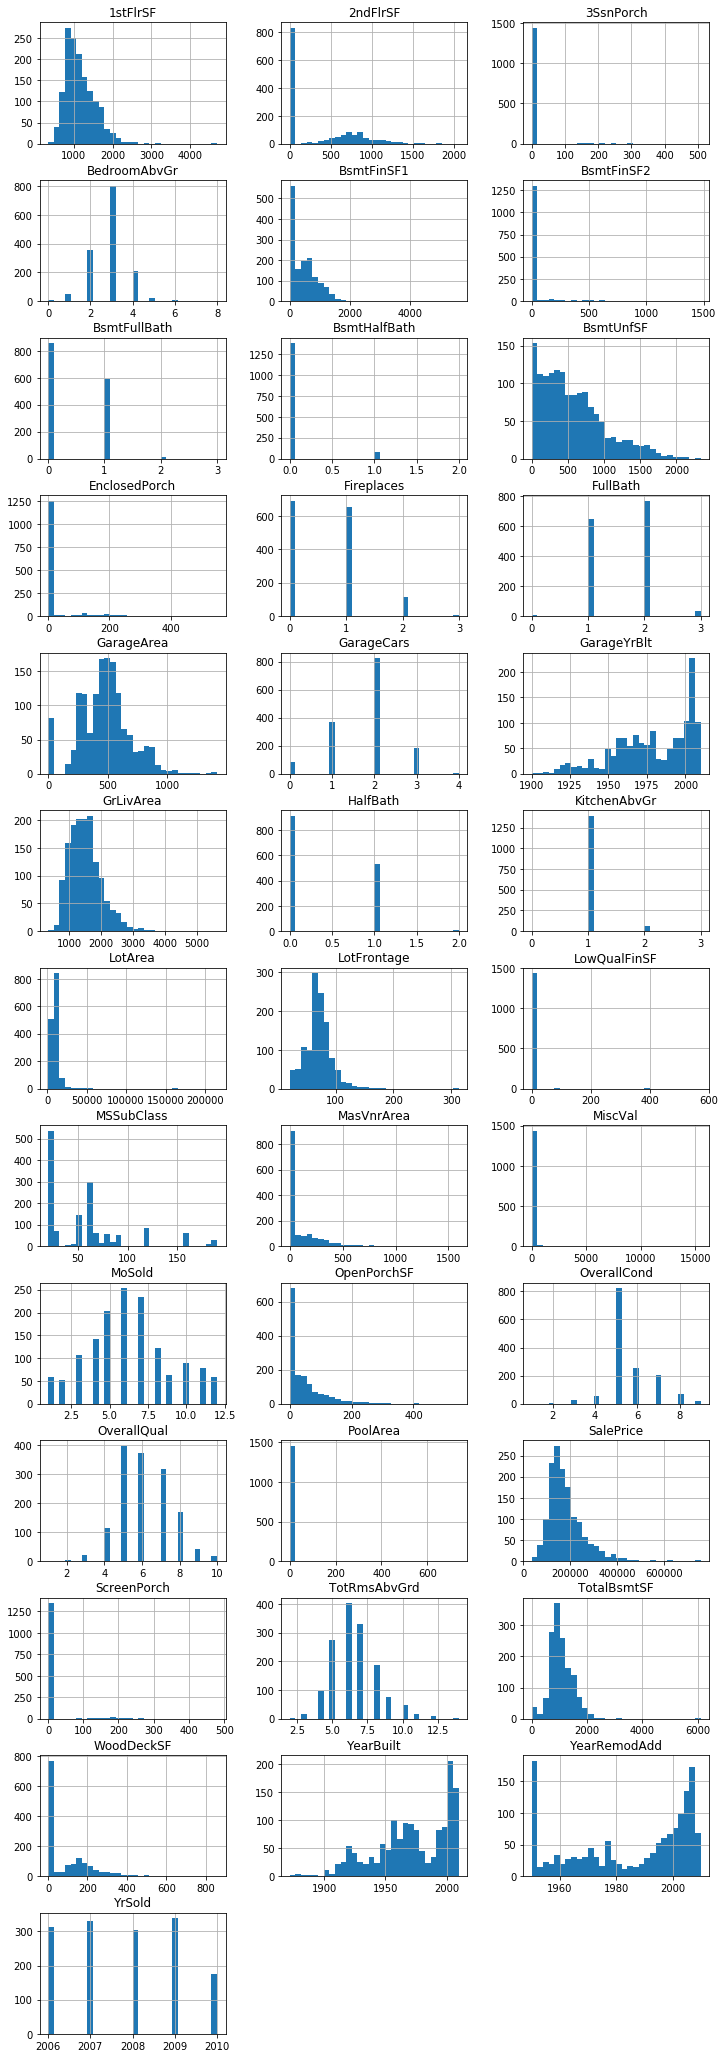

In [27]:
# Rough histograms of numerical features
n_num = train_raw.select_dtypes(exclude='object').shape[1]
train_raw.hist(figsize=(12, n_num), bins=30, 
               layout=(int(np.ceil(n_num / 3)), 3))
plt.show()

How to handle possible non-linear relationships???

    Feature engineering brainstorm:
    * Add / convert features?
        1stFlrSF -> log(1stFlrSF)
        
    * Add / convert numeric any to yes/no or multiple categories?
        Fireplaces -> Fireplace, 2nd Fireplace, 3+ Fireplace

How to handle correlated features???

      2nfFlrSF=0 shows up in HouseStyle
      
      GarageArea to GarageCars
      
      SF to TotRmsAbvGrd to BedRoomAbvGr
      
      1stFlrSF + 2ndFlrSF = GrLivArea ???
      
      BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSf = TotalBsmtSF ???
      
      
How to handle features that are largely 0 or NA???


MSSubClass is a numeric code -> convert to categorical
      Porch features
      BsmtFinSF2
      
    
YearRemodAdd

    info says same as construction date if no remodel, but spike at 1950
    it seems that data for remodeling before 1950 was not available 
    and was recorded as a 1950 remodeling (see cell below) 
    seems okay, could also try assuming no remodel or an average date

In [28]:
train_raw[['YearBuilt', 'YearRemodAdd']]

# Test if any houses where built before remodeling (per the data)
print((train_raw['YearBuilt'] > train_raw['YearRemodAdd']).any())

# Test if any houses built before 1950 were remodeled in a year other than 1950
display(train_raw[['YearBuilt', 'YearRemodAdd']]
 .loc[(train_raw['YearBuilt'] < 1950) & (train_raw['YearRemodAdd'] < 1950)]
 .sort_values(by='YearRemodAdd')
)

display(train_raw[['YearBuilt', 'YearRemodAdd']]
 .loc[(train_raw['YearBuilt'] < 1950) & (train_raw['YearRemodAdd'] == 1950)]
 .sort_values(by='YearRemodAdd')
)

display(train_raw[['YearBuilt', 'YearRemodAdd']]
 .loc[(train_raw['YearBuilt'] < 1950) & (train_raw['YearRemodAdd'] > 1950)]
 .sort_values(by='YearRemodAdd')
)

False


,YearBuilt,YearRemodAdd
Id,,


,YearBuilt,YearRemodAdd
Id,,
9,1931,1950
1029,1941,1950
1035,1938,1950
1060,1932,1950
...,...,...
564,1918,1950
566,1915,1950
577,1928,1950
1444,1916,1950


,YearBuilt,YearRemodAdd
Id,,
936,1926,1953
269,1940,1955
977,1923,1958
1333,1938,1958
...,...,...
1386,1922,2007
49,1920,2008
1124,1947,2008
293,1949,2008


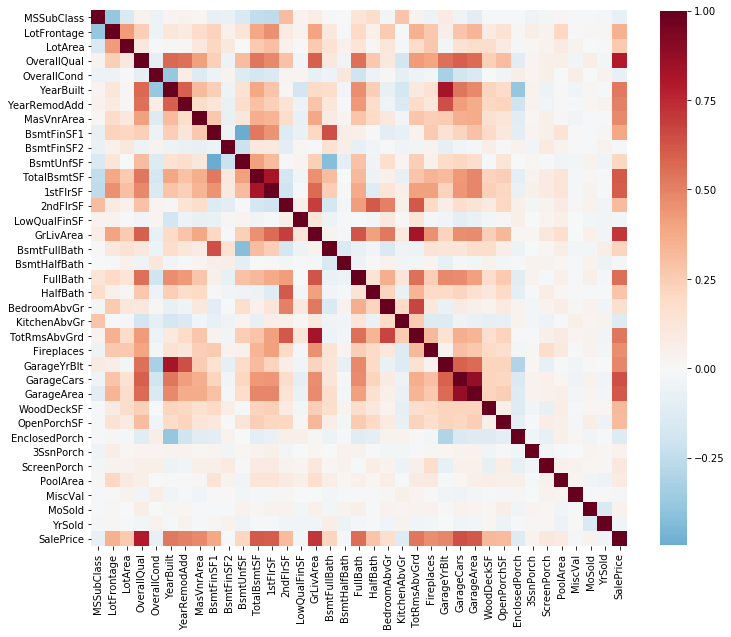

In [32]:
# Numerical Feature Correlations
fig = plt.figure(figsize=(12, 12))
ax = sns.heatmap(train_raw.corr(),
                 annot=False,
                 cmap='RdBu_r',
                 center=0,
                 cbar_kws={'shrink':0.82}  # Rough match to axis scaling below
                )
ax.axis('scaled')  # equal x and y increments 
plt.show()

Interesting???

    OverallQual correlates with almost everything, particularly with Sale Price
    OverallCond weekly anti correlated with almost everything
      Looks like 5 may have been used as a default (see below),
      alternatively most houses are 5 and feature is not important

Treatment of ordinal variables???

    Ordinal as categorical - loses information
    Ordinal as numeric - makes assumption that intervals are equal

    OverallQual and OverallCond are numeric by default, may change to categorical
      OverallQual correlates highly with SalePrice and may be significant cost to
      convert to categorical
    
    ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,
    BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond,
    PoolQC, Fence - are all categorical by default but could be converted to numeric

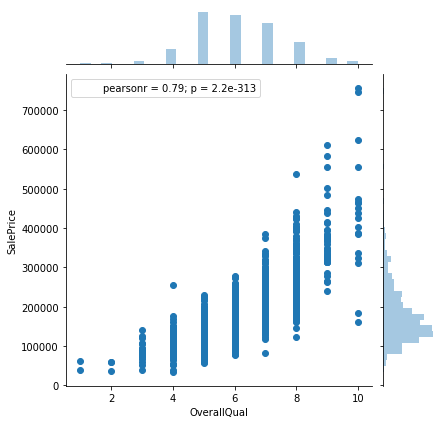

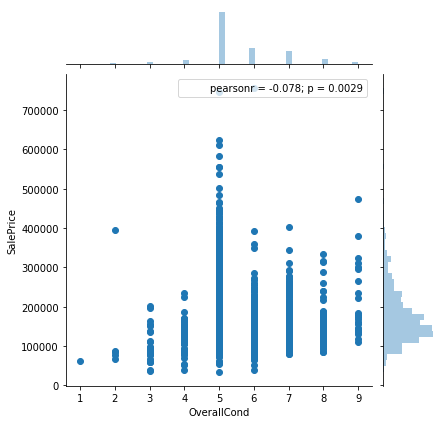

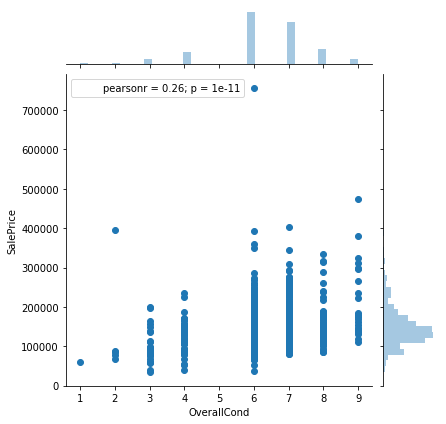

In [33]:
sns.jointplot(x='OverallQual', y='SalePrice', data=train_raw)
sns.jointplot(x='OverallCond', y='SalePrice', data=train_raw)
sns.jointplot(x='OverallCond', y='SalePrice', 
              data=train_raw.loc[train_raw['OverallCond'] != 5])

In [31]:
# Numerical features correlation with Sale Price

with pd.option_context('max_rows', None):
    display(train_raw.corr().loc[:, ['SalePrice']].sort_values(by='SalePrice'))

# Plot as heatmap
if False:
    fig = plt.figure(figsize=(12, 24))
    ax = sns.heatmap(train_raw.corr()
                              .loc[:, ['SalePrice']]
                              .sort_values(by='SalePrice'),
                     annot=True,
                     cmap='RdBu_r',
                     center=0,
                     cbar=False,
                     cbar_kws={'shrink':0.82}  # Rough match to axis scaling below
                    )
    ax.axis('scaled')  # equal x and y increments 
    plt.show()

,SalePrice
KitchenAbvGr,-0.136
EnclosedPorch,-0.129
MSSubClass,-0.084
OverallCond,-0.078
YrSold,-0.029
LowQualFinSF,-0.026
MiscVal,-0.021
BsmtHalfBath,-0.017
BsmtFinSF2,-0.011
3SsnPorch,0.045


In [135]:
def calc_area_diff(df):
    df = df.copy()
    df['AreaDiff'] = (df['GrLivArea'] -  
                      (df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF']))
    return df

def screen_area_diff(df):
    return df.loc[df['AreaDiff'] != 0]

(train_raw[['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']]
 .pipe(calc_area_diff)
 .pipe(screen_area_diff)
)

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,AreaDiff
Id,,,,,


     GrLivArea is 1stFlrSF + 2ndFlrSF + LowQualFinSF 
     
     TotalBsmtSF is BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF

In [140]:
def calc_bsmtarea_diff(df):
    df = df.copy()
    df['BsmtAreaDiff'] = (df['TotalBsmtSF'] -  
                      (df['BsmtFinSF1'] + df['BsmtFinSF2'] 
                       + df['BsmtUnfSF']))
    return df

def screen_bsmtarea_diff(df):
    return df.loc[df['BsmtAreaDiff'] != 0]

(train_raw[['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']]
 .pipe(calc_bsmtarea_diff)
 .pipe(screen_bsmtarea_diff)
)

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,BsmtAreaDiff
Id,,,,,


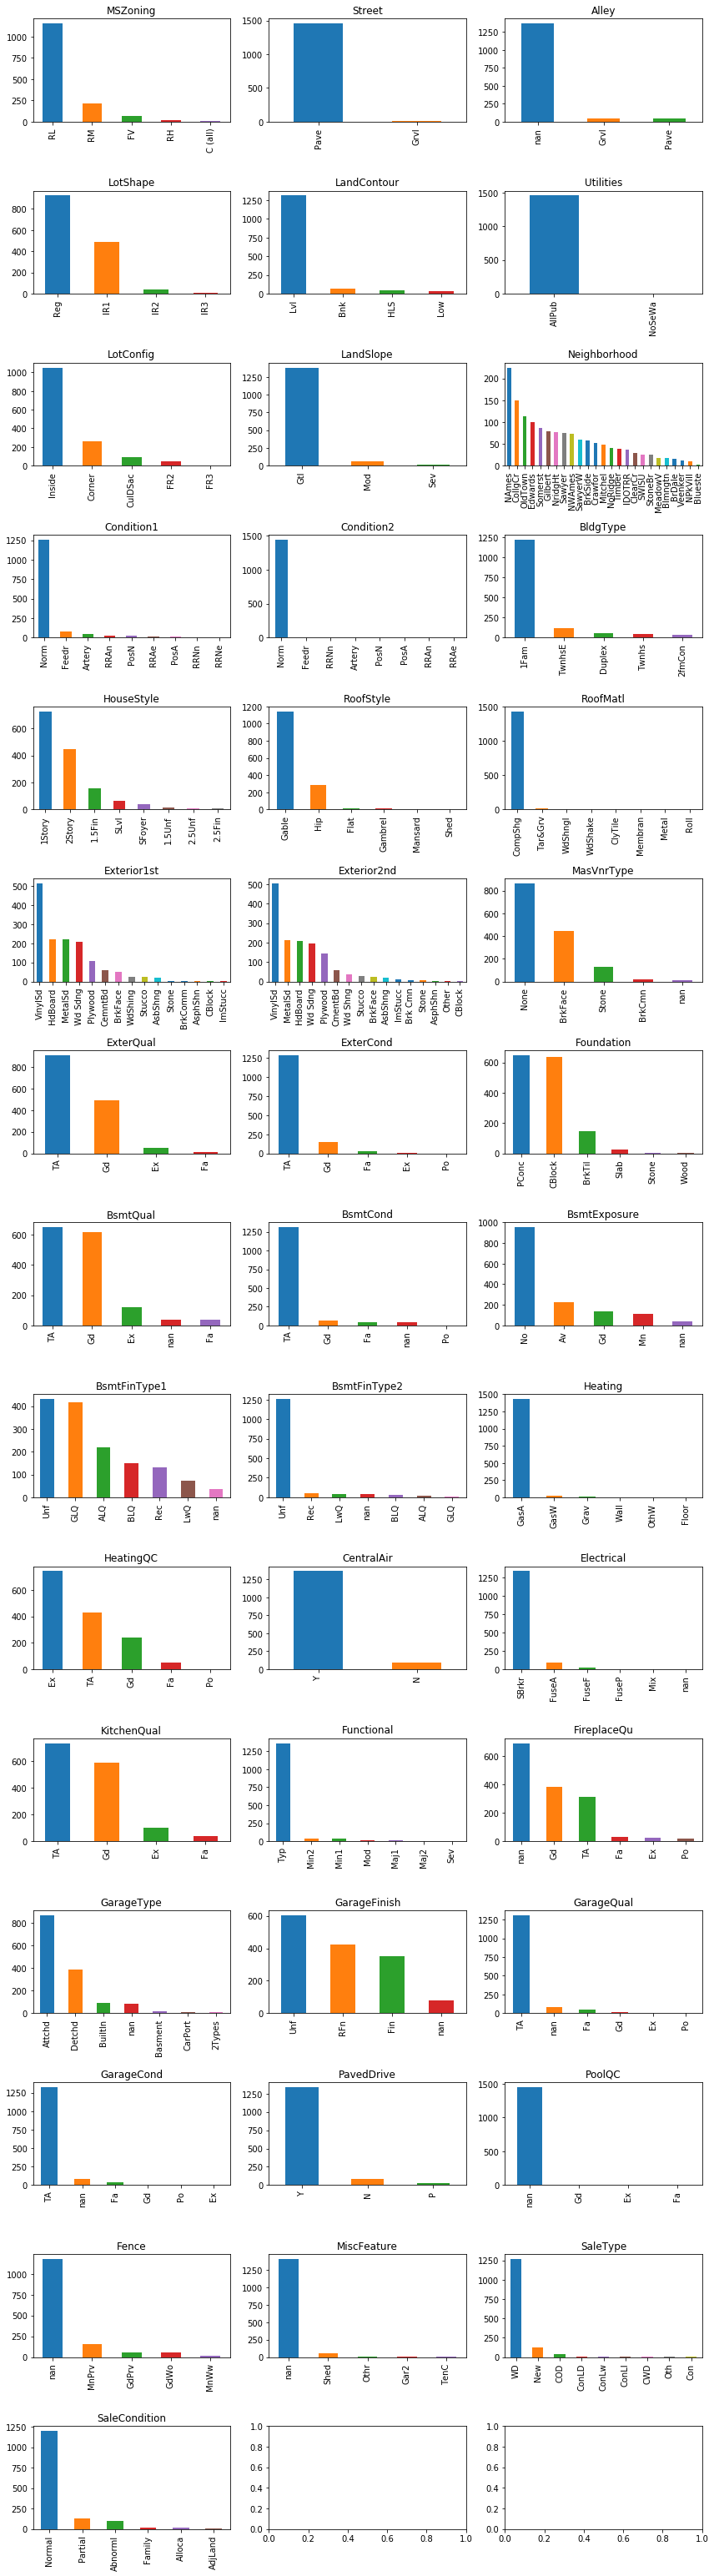

In [199]:
# Rough count plots of categorical features
n_cat = train_raw.select_dtypes(include='object').shape[1]

fig, ax = plt.subplots(int(np.ceil(n_cat / 3)), 3, figsize=(12, n_cat))
i = 0
j = 0

for col in train_raw.select_dtypes(include='object').columns:
    #sns.countplot(train_raw[col], ax=ax[i, j])
    train_raw[col].value_counts(dropna=False).plot.bar(ax=ax[i, j])
    ax[i, j].set_title(col)
    
    if j == 2:
        j = 0
        i += 1
    else:
        j += 1
    
plt.tight_layout()
plt.show()


2

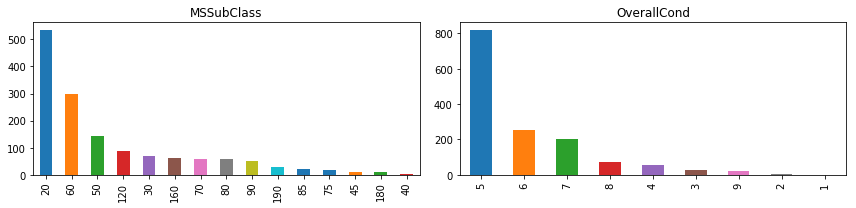

In [215]:
n_cat = train_raw[cols].shape[1]

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

train_raw['MSSubClass'].value_counts(dropna=False).plot.bar(ax=ax[0])
ax[0].set_title('MSSubClass')
train_raw['OverallCond'].value_counts(dropna=False).plot.bar(ax=ax[1])
ax[1].set_title('OverallCond')
    
plt.tight_layout()
plt.show()

Many categorical features class imbalance
    Could lead to overfitting if not careful


Additional categorical notes

    Condition1 and Condition2 
    
        Condition2 extremely rare
    
        technically should probably be "two"-hot encoded (that is instead of a second set of features for Condition2, it should chance a False to True in the set of features from Condition1)

    Exterior1st and Exterior2nd
    
        Looks like Exterior1st is repeated if not different
        
        Looks like Exterior2nd is almost never different
    
            
    

## Data preparation

In [141]:
train_x = train_raw.drop('SalePrice', axis=1)
train_y = train_raw['SalePrice']

In [145]:
# Datatype conversions

# Convert MSSubClass to string for use as nominal, categorical feature
train_x['MSSubClass'] = train_x['MSSubClass'].astype(str)

# Convert OverallCond to string 
#   unusual frequency of 5s, but other values seem meaningful (see data exploration)
train_x['OverallCond'] = train_x['OverallCond'].astype(str)

# Keeping OverallQual as numeric (for now)
#   to keep high correlation with SalesPrice (see data exploration)
#   may opt to change if assumption of linear differences is too far off 

# Keeping other ordinal features as categorical (for now)
#   to ensure differences in rankings are not overstated
#   (see data exploration)

In [ ]:
# Two-hot encoding?

# Condition1 and Condition2

# Exterior1st and Exterior2nd 

Id
1       60
2       20
3       60
4       70
        ..
1457    20
1458    70
1459    20
1460    20
Name: MSSubClass, Length: 1460, dtype: object

In [37]:
train_y

Id
1       208500
2       181500
3       223500
4       140000
         ...  
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64